In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',  encoding ='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**What we will be doing**
* Data Cleaning
* EDA
* Text Processing
* Model Building
* Evaluation
* Improvement
* Website
* Deployment

# DATA CLEANING

In [5]:
#Dropping last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace = True)

In [6]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace= True)

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.target.value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
df['target'] = label_encoder.fit_transform(df['target'])


In [10]:
df.target.value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
#Remove Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.shape

(5169, 2)

# EDA

In [15]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7b0c6ba9d5d0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

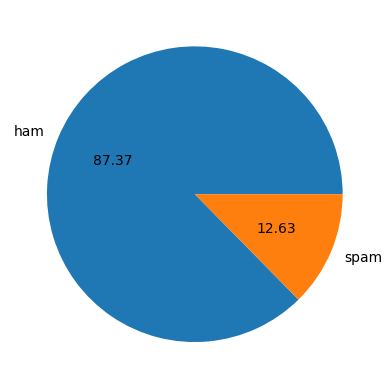

In [16]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels=['ham','spam'], autopct='%0.2f')

**Imabalnced Dataset**

In [17]:
import nltk


In [18]:
df['num_alphabets']= df.text.apply(len)

In [19]:
df.head()

,target,text,num_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#Word Analysis
df['word_counts'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df.head()

,target,text,num_alphabets,word_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#Senetence Analysis
df['sen_counts'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_alphabets,word_counts,sen_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_alphabets','word_counts','sen_counts']].describe()

,num_alphabets,word_counts,sen_counts
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [25]:
df[df['target']==0][['num_alphabets','word_counts','sen_counts']].describe()

,num_alphabets,word_counts,sen_counts
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [26]:
df[df['target']==1][['num_alphabets','word_counts','sen_counts']].describe()

,num_alphabets,word_counts,sen_counts
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_alphabets', ylabel='Count'>

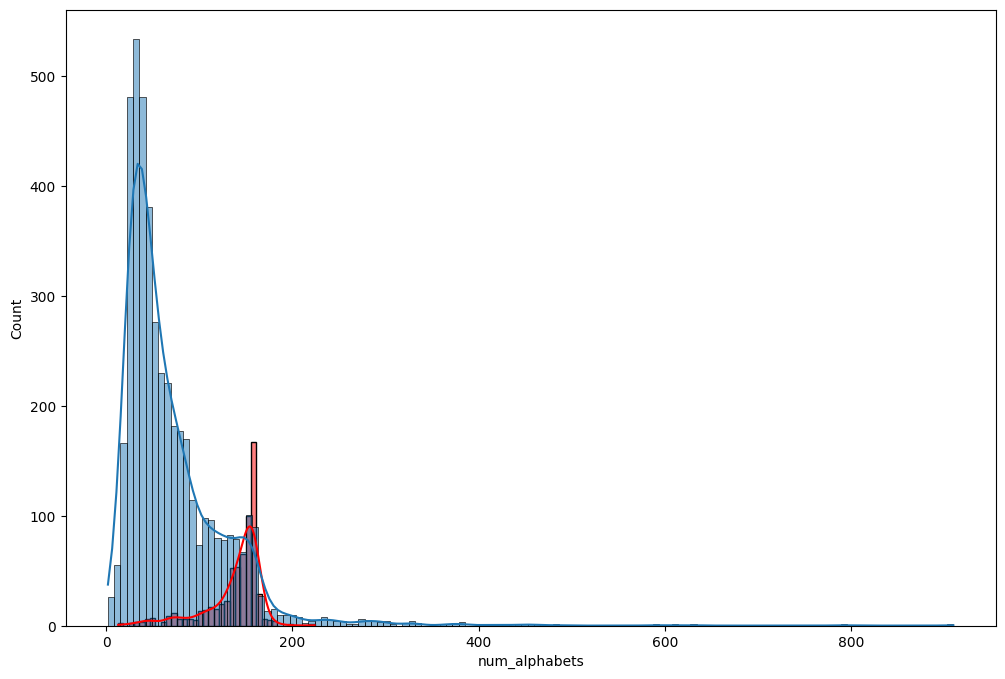

In [27]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==1]['num_alphabets'],kde=True,color='red')
sns.histplot(df[df['target']==0]['num_alphabets'],kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='word_counts', ylabel='Count'>

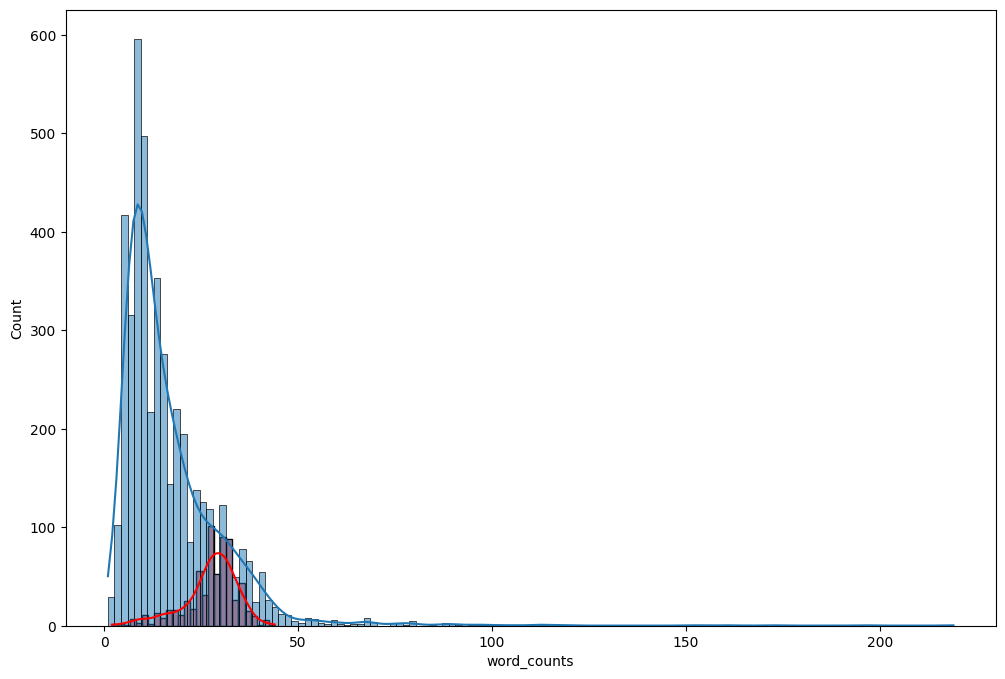

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==1]['word_counts'],kde=True,color='red')
sns.histplot(df[df['target']==0]['word_counts'],kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sen_counts', ylabel='Count'>

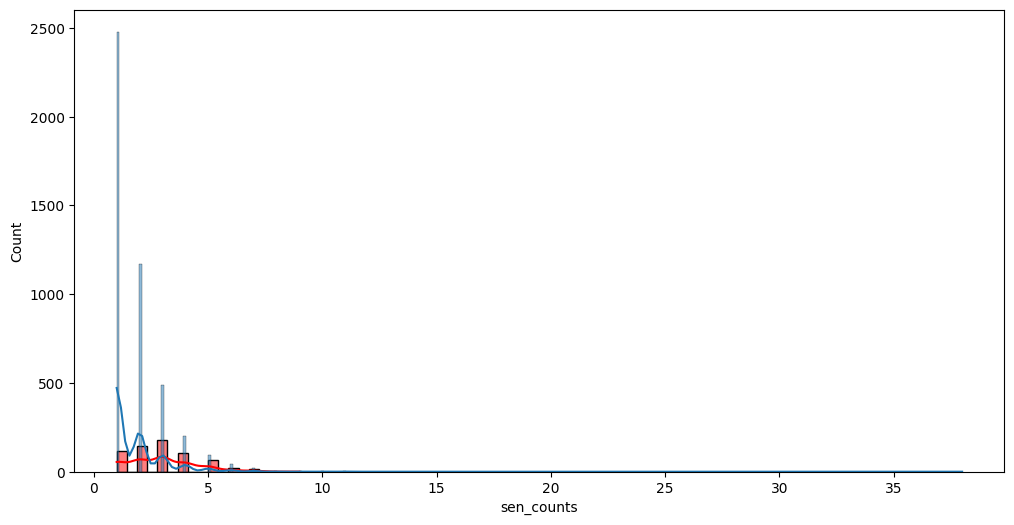

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==1]['sen_counts'],kde=True,color='red')
sns.histplot(df[df['target']==0]['sen_counts'],kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

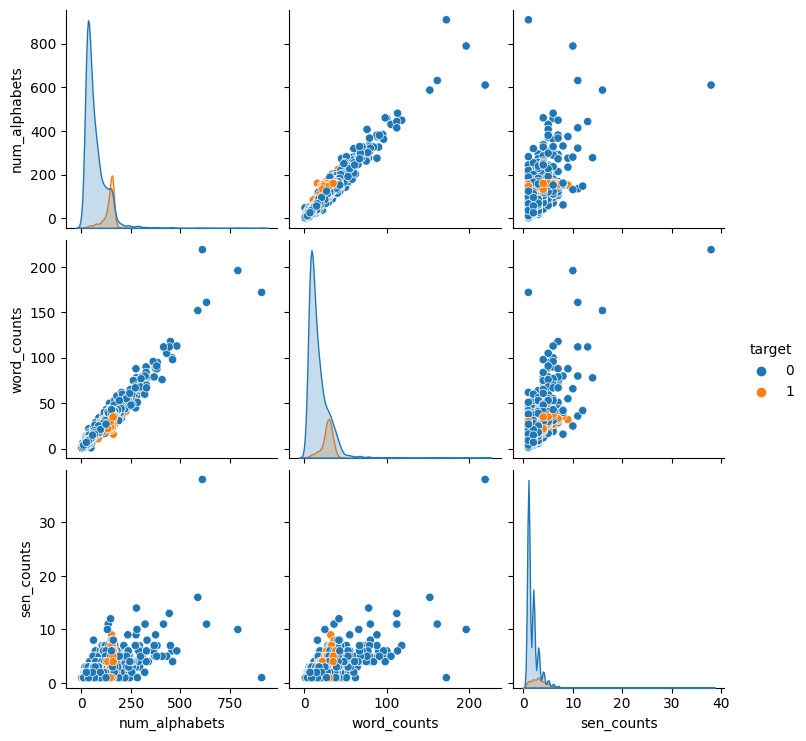

In [30]:
sns.pairplot(df,hue='target')

In [31]:
df.head()

,target,text,num_alphabets,word_counts,sen_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
new_df= df.drop(columns=['text'])

<Axes: >

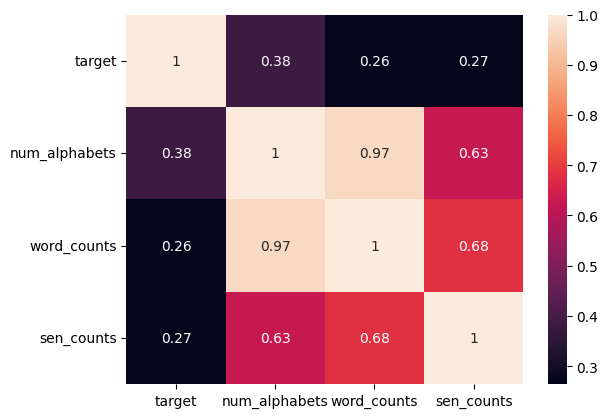

In [33]:
sns.heatmap(new_df.corr(),annot=True)

***We will use num_alphabet feature for model training***

# Data Preprocessing
* Lowercasing
* tokenization
* Removing Stop Words
* Removing special Characters
* Stemming

In [34]:
from nltk import word_tokenize 

In [35]:
from nltk.stem import PorterStemmer 
ps = PorterStemmer()


In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text= y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [39]:
transform_text('Hi, how are %% you Nitish, where are you going?')

'hi nitish go'

In [40]:
df['transformed'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_alphabets,word_counts,sen_counts,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10, background_color='white',)

In [43]:
we_generate=wc.generate(df[df['target']==1]['transformed'].str.cat(sep=" "))

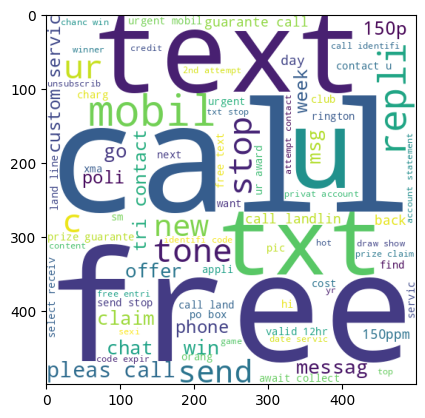

In [44]:
plt.imshow(we_generate)

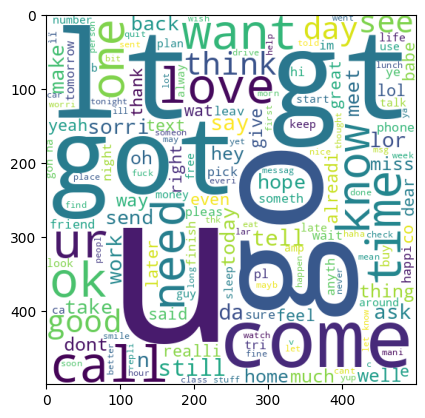

In [45]:
we_generateham=wc.generate(df[df['target']==0]['transformed'].str.cat(sep=" "))
plt.imshow(we_generateham)

***Top Spam WOrds***

In [46]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [47]:
len(spam_corpus)

9883

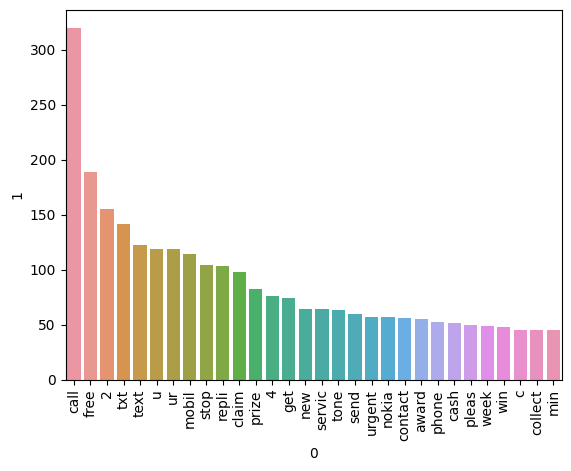

In [48]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

***Top Ham Words***

In [49]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
        

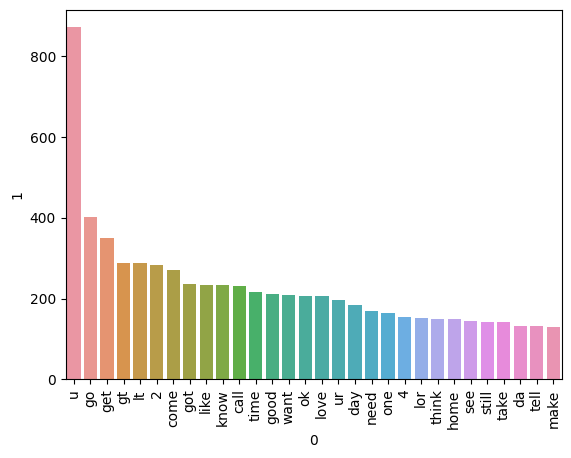

In [50]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building NaiveBayes+BOW

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [52]:
X= cv.fit_transform(df['transformed']).toarray()

In [53]:
X.shape

(5169, 6629)

In [54]:
y = df['target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [58]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [60]:
gnb.fit(X_train, y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test, y_predict1))
print(precision_score(y_test, y_predict1))

0.8751465416178195
[[1293  179]
 [  34  200]]
0.5277044854881267


In [61]:
mnb.fit(X_train, y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test, y_predict2))
print(precision_score(y_test, y_predict2))

0.9753810082063306
[[1449   23]
 [  19  215]]
0.9033613445378151


In [62]:
bnb.fit(X_train, y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test, y_predict3))
print(precision_score(y_test, y_predict3))

0.9654161781946072
[[1467    5]
 [  54  180]]
0.972972972972973


# Model Building Naive Bayes + TFIDF Vectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc = TfidfVectorizer()

In [64]:
X1= vc.fit_transform(df['transformed']).toarray()

In [65]:
X.shape

(5169, 6629)

In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y, test_size=0.33, random_state=42)

In [67]:
gnb.fit(X_train1, y_train1)
y_predict4 = gnb.predict(X_test1)
print(accuracy_score(y_test1,y_predict4))
print(confusion_matrix(y_test1, y_predict4))
print(precision_score(y_test1, y_predict4))

0.8733880422039859
[[1294  178]
 [  38  196]]
0.5240641711229946


In [68]:
mnb.fit(X_train1, y_train1)
y_predict5 = mnb.predict(X_test1)
print(accuracy_score(y_test1,y_predict5))
print(confusion_matrix(y_test1, y_predict5))
print(precision_score(y_test1, y_predict5))

0.9519343493552169
[[1472    0]
 [  82  152]]
1.0


In [69]:
bnb.fit(X_train1, y_train1)
y_predict6 = bnb.predict(X_test1)
print(accuracy_score(y_test1,y_predict6))
print(confusion_matrix(y_test1, y_predict6))
print(precision_score(y_test1, y_predict6))

0.9654161781946072
[[1467    5]
 [  54  180]]
0.972972972972973


# **We Will choose model tfidf->mnb**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [72]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
#using x_train of tfidf
train_classifier(svc,X_train1,y_train1,X_test1,y_test1)

(0.9730363423212193, 0.9519230769230769)

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train1,y_train1,X_test1,y_test1)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9730363423212193
Precision -  0.9519230769230769
For  KN
Accuracy -  0.8921453692848769
Precision -  1.0
For  NB
Accuracy -  0.9519343493552169
Precision -  1.0
For  DT
Accuracy -  0.9349355216881594
Precision -  0.8121827411167513
For  LR
Accuracy -  0.9425556858147714
Precision -  0.8953488372093024
For  RF
Accuracy -  0.9683470105509965
Precision -  0.9891304347826086
For  AdaBoost
Accuracy -  0.9531066822977726
Precision -  0.8888888888888888
For  BgC
Accuracy -  0.9601406799531067
Precision -  0.8878504672897196
For  ETC
Accuracy -  0.9736225087924971
Precision -  0.9846153846153847
For  GBDT
Accuracy -  0.9536928487690504
Precision -  0.9696969696969697
For  xgb
Accuracy -  0.9695193434935522
Precision -  0.9375


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.892145,1.000000
2,NB,0.951934,1.000000
5,RF,0.968347,0.989130
8,ETC,0.973623,0.984615
9,GBDT,0.953693,0.969697
0,SVC,0.973036,0.951923
10,xgb,0.969519,0.937500
4,LR,0.942556,0.895349
6,AdaBoost,0.953107,0.888889
7,BgC,0.960141,0.887850


In [78]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

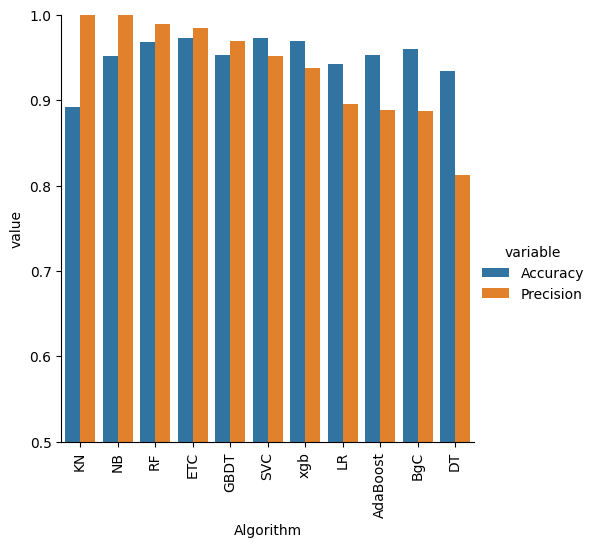

In [79]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# **model improve->Change the max_features parameter of TfIdf**

In [80]:
vc1 = TfidfVectorizer(max_features=3000)
X_new= cv.fit_transform(df['transformed']).toarray()
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split( X_new, y, test_size=0.33, random_state=42)

In [81]:
df


,target,text,num_alphabets,word_counts,sen_counts,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_new,y_train_new,X_test_new,y_test_new)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9314185228604924
Precision -  0.76
For  KN
Accuracy -  0.8991793669402111
Precision -  1.0
For  NB
Accuracy -  0.9753810082063306
Precision -  0.9033613445378151
For  DT
Accuracy -  0.9296600234466589
Precision -  0.9384615384615385
For  LR
Accuracy -  0.9689331770222743
Precision -  0.9502487562189055
For  RF
Accuracy -  0.9660023446658851
Precision -  0.9888888888888889
For  AdaBoost
Accuracy -  0.9601406799531067
Precision -  0.9414893617021277
For  BgC
Accuracy -  0.9595545134818289
Precision -  0.9064039408866995
For  ETC
Accuracy -  0.9730363423212193
Precision -  0.9947368421052631
For  GBDT
Accuracy -  0.9443141852286049
Precision -  0.9161676646706587
For  xgb
Accuracy -  0.9671746776084408
Precision -  0.9405940594059405


In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

# ***Scaling using Min-Max Scaler***

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X_new)

In [85]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split( X_scaled, y, test_size=0.33, random_state=42)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_scaled,y_train_scaled,X_test_scaled,y_test_scaled)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.963071512309496
Precision -  0.9052132701421801
For  KN
Accuracy -  0.8868698710433763
Precision -  1.0
For  NB
Accuracy -  0.9800703399765534
Precision -  0.9347826086956522
For  DT
Accuracy -  0.9284876905041032
Precision -  0.9242424242424242
For  LR
Accuracy -  0.963071512309496
Precision -  0.9430051813471503
For  RF
Accuracy -  0.9660023446658851
Precision -  0.9888888888888889
For  AdaBoost
Accuracy -  0.9601406799531067
Precision -  0.9414893617021277
For  BgC
Accuracy -  0.9595545134818289
Precision -  0.9064039408866995
For  ETC
Accuracy -  0.9730363423212193
Precision -  0.9947368421052631
For  GBDT
Accuracy -  0.9443141852286049
Precision -  0.9161676646706587
For  xgb
Accuracy -  0.9671746776084408
Precision -  0.9405940594059405


In [87]:
temp_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [88]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [89]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.892145,1.000000,0.899179,1.000000
1,NB,0.951934,1.000000,0.975381,0.903361
2,RF,0.968347,0.989130,0.966002,0.988889
3,ETC,0.973623,0.984615,0.973036,0.994737
4,GBDT,0.953693,0.969697,0.944314,0.916168
5,SVC,0.973036,0.951923,0.931419,0.760000
6,xgb,0.969519,0.937500,0.967175,0.940594
7,LR,0.942556,0.895349,0.968933,0.950249
8,AdaBoost,0.953107,0.888889,0.960141,0.941489
9,BgC,0.960141,0.887850,0.959555,0.906404


In [90]:
new_df=new_df.merge(temp_df_scaled,on='Algorithm')

In [91]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.892145,1.000000,0.899179,1.000000,0.886870,1.000000
1,NB,0.951934,1.000000,0.975381,0.903361,0.980070,0.934783
2,RF,0.968347,0.989130,0.966002,0.988889,0.966002,0.988889
3,ETC,0.973623,0.984615,0.973036,0.994737,0.973036,0.994737
4,GBDT,0.953693,0.969697,0.944314,0.916168,0.944314,0.916168
5,SVC,0.973036,0.951923,0.931419,0.760000,0.963072,0.905213
6,xgb,0.969519,0.937500,0.967175,0.940594,0.967175,0.940594
7,LR,0.942556,0.895349,0.968933,0.950249,0.963072,0.943005
8,AdaBoost,0.953107,0.888889,0.960141,0.941489,0.960141,0.941489
9,BgC,0.960141,0.887850,0.959555,0.906404,0.959555,0.906404


# ***Lets Do it using the num character features we have created***

In [92]:
vc1 = TfidfVectorizer(max_features=3000)
X_char= vc1.fit_transform(df['transformed']).toarray()
#Appending the num_character col to X

# 
X_char = np.hstack((X_char,df['num_alphabets'].values.reshape(-1,1)))
scaler = MinMaxScaler()
X_char= scaler.fit_transform(X_char)
X_train_char, X_test_char, y_train_char, y_test_char = train_test_split( X_char, y, test_size=0.33, random_state=42)

In [93]:
X_char.shape

(5169, 3001)

In [94]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_char,y_train_char,X_test_char,y_test_char)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9718640093786636
Precision -  0.9386792452830188
For  KN
Accuracy -  0.8962485345838218
Precision -  1.0
For  NB
Accuracy -  0.9800703399765534
Precision -  0.9672897196261683
For  DT
Accuracy -  0.9372801875732708
Precision -  0.839572192513369
For  LR
Accuracy -  0.9607268464243846
Precision -  0.946524064171123
For  RF
Accuracy -  0.97010550996483
Precision -  0.9740932642487047
For  AdaBoost
Accuracy -  0.9665885111371629
Precision -  0.9154929577464789
For  BgC
Accuracy -  0.9554513481828839
Precision -  0.8405172413793104
For  ETC
Accuracy -  0.977725674091442
Precision -  0.9757281553398058
For  GBDT
Accuracy -  0.9495896834701055
Precision -  0.9157303370786517
For  xgb
Accuracy -  0.9706916764361079
Precision -  0.9380952380952381


***Above i have also Scaled the input columns***

In [95]:
temp_dfchar = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [96]:
new_df=new_df.merge(temp_dfchar,on='Algorithm')

In [97]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.892145,1.000000,0.899179,1.000000,0.886870,1.000000,0.896249,1.000000
1,NB,0.951934,1.000000,0.975381,0.903361,0.980070,0.934783,0.980070,0.967290
2,RF,0.968347,0.989130,0.966002,0.988889,0.966002,0.988889,0.970106,0.974093
3,ETC,0.973623,0.984615,0.973036,0.994737,0.973036,0.994737,0.977726,0.975728
4,GBDT,0.953693,0.969697,0.944314,0.916168,0.944314,0.916168,0.949590,0.915730
5,SVC,0.973036,0.951923,0.931419,0.760000,0.963072,0.905213,0.971864,0.938679
6,xgb,0.969519,0.937500,0.967175,0.940594,0.967175,0.940594,0.970692,0.938095
7,LR,0.942556,0.895349,0.968933,0.950249,0.963072,0.943005,0.960727,0.946524
8,AdaBoost,0.953107,0.888889,0.960141,0.941489,0.960141,0.941489,0.966589,0.915493
9,BgC,0.960141,0.887850,0.959555,0.906404,0.959555,0.906404,0.955451,0.840517


# **Voting Classifier** (BOW)

In [98]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [99]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [100]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [101]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9830011723329426
Precision 0.9767441860465116


In [102]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [103]:
from sklearn.ensemble import StackingClassifier

In [104]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [105]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9824150058616647
Precision 0.9636363636363636


# Voting Classifier (TFIDF) -- X_train1, y_train1

In [106]:
voting1 = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [107]:
voting1.fit(X_train1,y_train1)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [108]:
y_pred1 = voting1.predict(X_test1)
print("Accuracy",accuracy_score(y_test1,y_pred1))
print("Precision",precision_score(y_test1,y_pred1))

Accuracy 0.9788980070339977
Precision 0.9900990099009901


# I am choosing Voting Classifier (TFIDF) model, can use any of the above

In [109]:
import pickle
pickle.dump(vc,open('vectorizer.pkl','wb'))
pickle.dump(voting1,open('model.pkl','wb'))